In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#get features from feature.txt
feature = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    for line in f.readlines():
        feature.append(line.split()[1])
print('Total number of features: ',len(feature))

Total number of features:  561


In [17]:
#get data from train.csv
x_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt',delim_whitespace=True,header=None)
x_train.columns = feature


#add subject column to daataframe
x_train['Subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt',squeeze=True,header=None)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt',header=None,squeeze=True)
y_train.columns = ['Activity']
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

x_train['Activity'] = y_train
x_train['Activity_label'] = y_train_labels
x_train.sample()

C:\Users\user\AppData\Local\Temp\ipykernel_15688\23556384.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  x_train['Subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt',squeeze=True,header=None)
C:\Users\user\AppData\Local\Temp\ipykernel_15688\23556384.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt',header=None,squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,Activity_label
308,0.24404,-0.030304,-0.113635,-0.309743,0.137253,-0.022658,-0.350767,0.195145,-0.003446,-0.221553,...,0.262252,-0.680334,-0.943177,-0.150163,-0.626028,0.347029,0.086967,1,2,WALKING_UPSTAIRS


In [19]:
x_train.shape

(7352, 564)

In [22]:
#get data from test.csv
x_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt',delim_whitespace=True,header=None)
x_test.columns = feature


#add subject column to daataframe
x_test['Subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt',squeeze=True,header=None)

y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt',header=None,squeeze=True)
y_test.columns = ['Activity']
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

test = x_test
test['Activity'] = y_test
test['Activity_label'] = y_test_labels
test.sample()

C:\Users\user\AppData\Local\Temp\ipykernel_15688\1345734054.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  x_test['Subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt',squeeze=True,header=None)
C:\Users\user\AppData\Local\Temp\ipykernel_15688\1345734054.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt',header=None,squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,Activity_label
2636,0.282504,-0.017227,-0.108119,-0.970277,-0.992162,-0.99056,-0.969908,-0.99095,-0.9906,-0.912239,...,-0.031737,-0.555828,0.626501,0.884613,0.539456,-0.487446,-0.518215,24,6,LAYING


In [24]:
print('No of duplicate rows in train: ',sum(x_train.duplicated()))
print('No of duplicate rows in test: ',sum(test.duplicated()))

No of duplicate rows in train:  0
No of duplicate rows in test:  0


In [28]:
print('null values in train: ',x_train.isnull().values.sum())
print('null values in test: ',x_test.isnull().values.sum())

null values in train:  0
null values in test:  0


C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


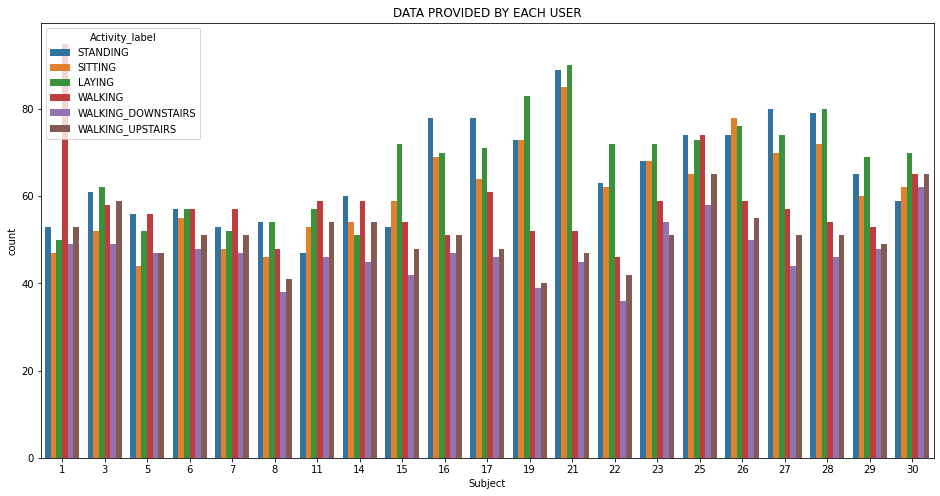

In [29]:
plt.figure(figsize=(16,8))
plt.title('DATA PROVIDED BY EACH USER')
sns.countplot('Subject',hue='Activity_label',data = x_train)
plt.show()

We have got almost same number of reading from all the subjects

C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


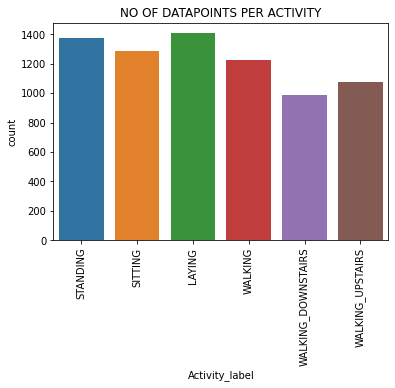

In [31]:
plt.title('NO OF DATAPOINTS PER ACTIVITY')
sns.countplot('Activity_label',data = x_train)
plt.xticks(rotation=90)
plt.show()

Observation:
Our data is well balanced (almost)

In [32]:
column = x_train.columns

#removing -,()
column = column.str.replace('[()]','')
column = column.str.replace('[,]','')
column = column.str.replace('[-]','')

x_train.columns = column
test.columns = column

C:\Users\user\AppData\Local\Temp\ipykernel_15688\2449376804.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('[()]','')
C:\Users\user\AppData\Local\Temp\ipykernel_15688\2449376804.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('[,]','')
C:\Users\user\AppData\Local\Temp\ipykernel_15688\2449376804.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('[-]','')


In [33]:
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Subject', 'Activity', 'Activity_label'],
      dtype='object', length=564)

In [35]:
x_train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-pac

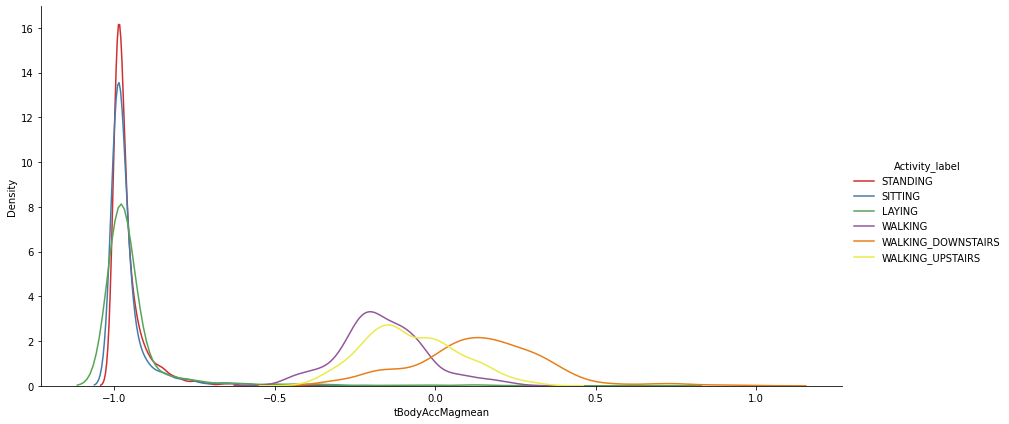

In [40]:
sns.set_palette('Set1',desat=0.80)
facetgrid = sns.FacetGrid(x_train,hue='Activity_label',size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist=False).add_legend()
plt.show();

C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-pac

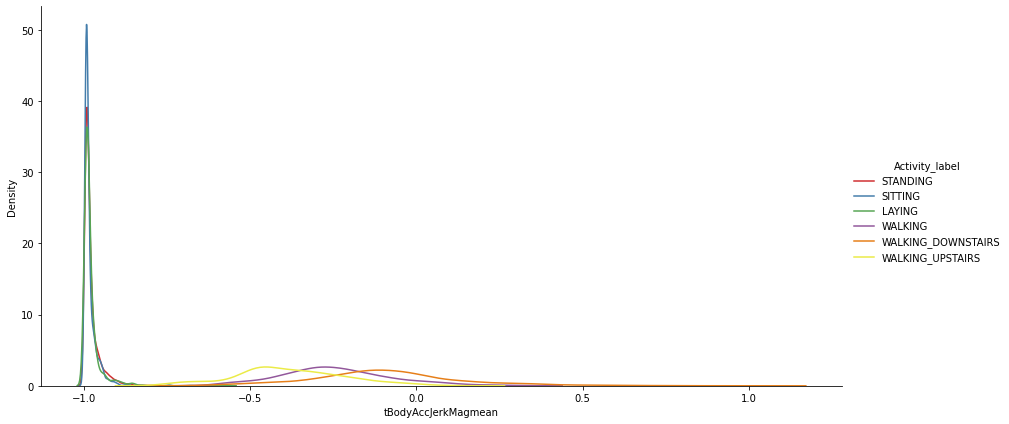

In [43]:
sns.set_palette('Set1',desat=0.80)
facetgrid = sns.FacetGrid(x_train,hue='Activity_label',size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccJerkMagmean',hist=False).add_legend()
plt.show();

C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\newEnv\lib\site-pac

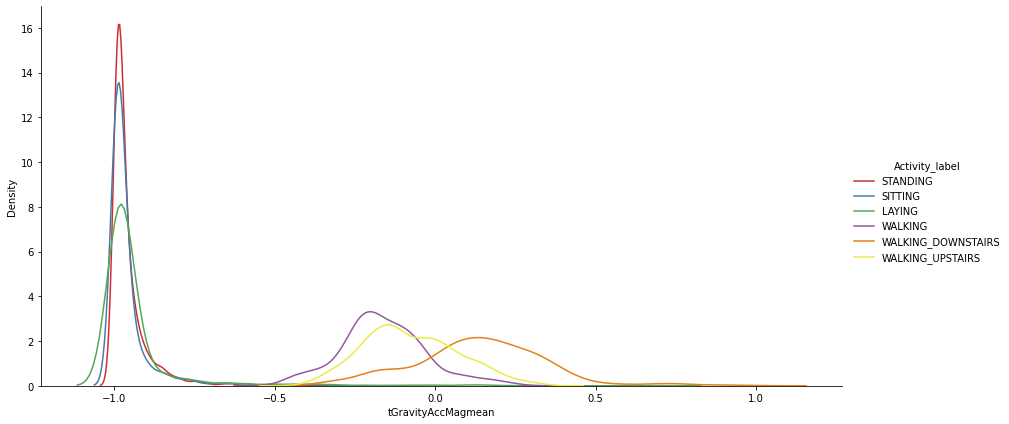

In [51]:
sns.set_palette('Set1',desat=0.80)
facetgrid = sns.FacetGrid(x_train,hue='Activity_label',size=6,aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean',hist=False).add_legend()
plt.show();

In [52]:
import warnings
warnings.filterwarnings("ignore")

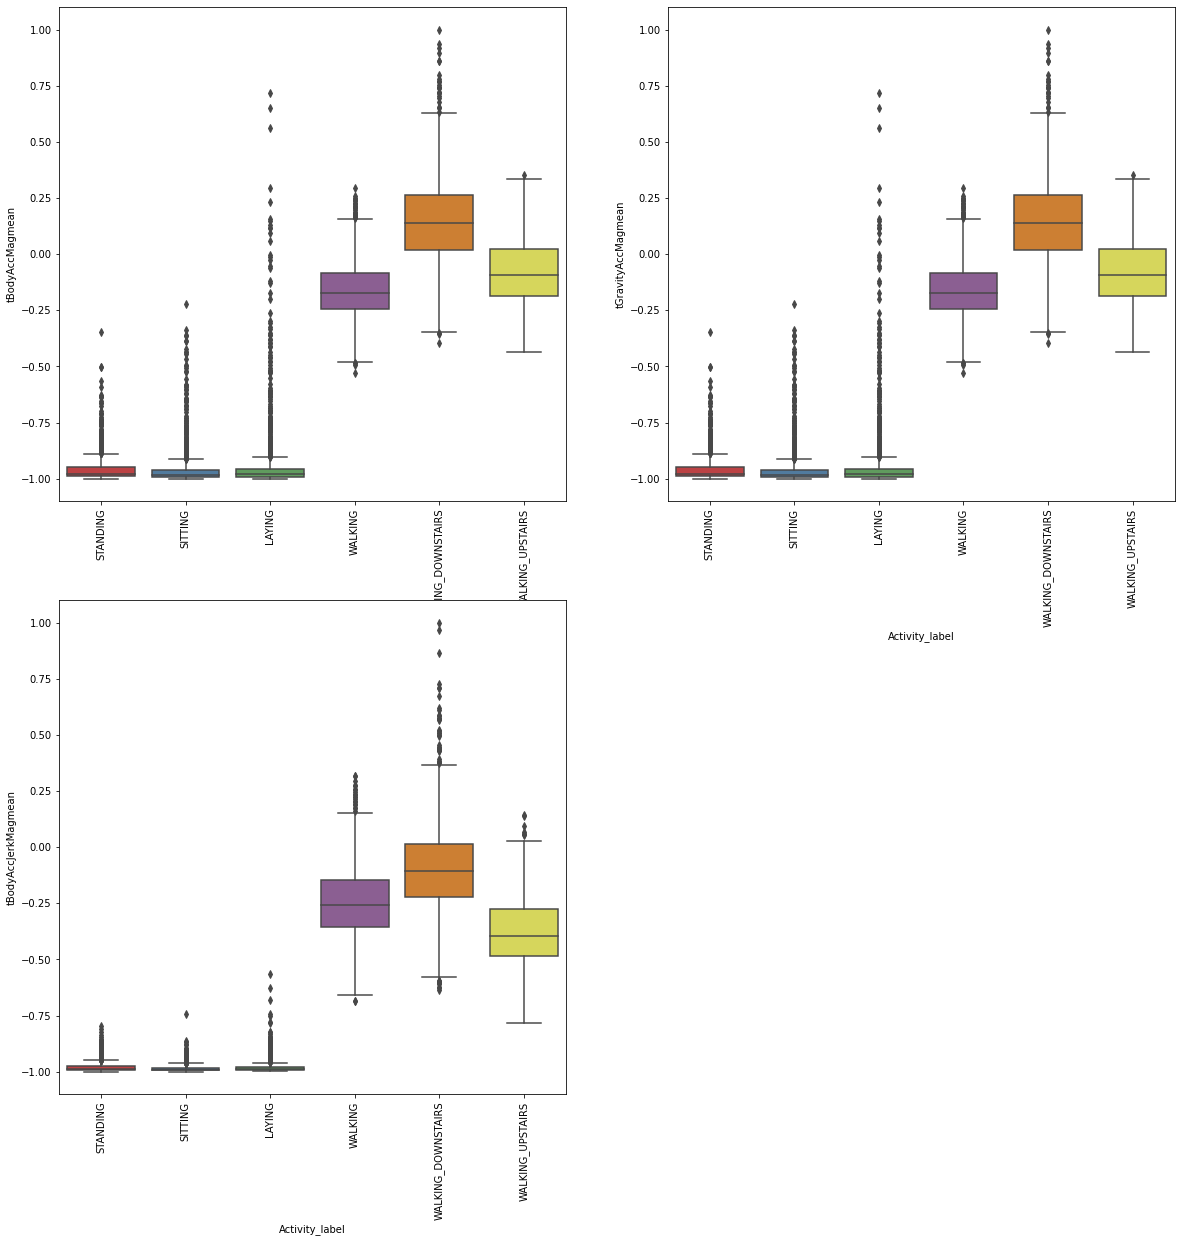

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x='Activity_label',y='tBodyAccMagmean',data=x_train)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='Activity_label',y='tGravityAccMagmean',data=x_train)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='Activity_label',y='tBodyAccJerkMagmean',data=x_train)
plt.xticks(rotation=90);

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

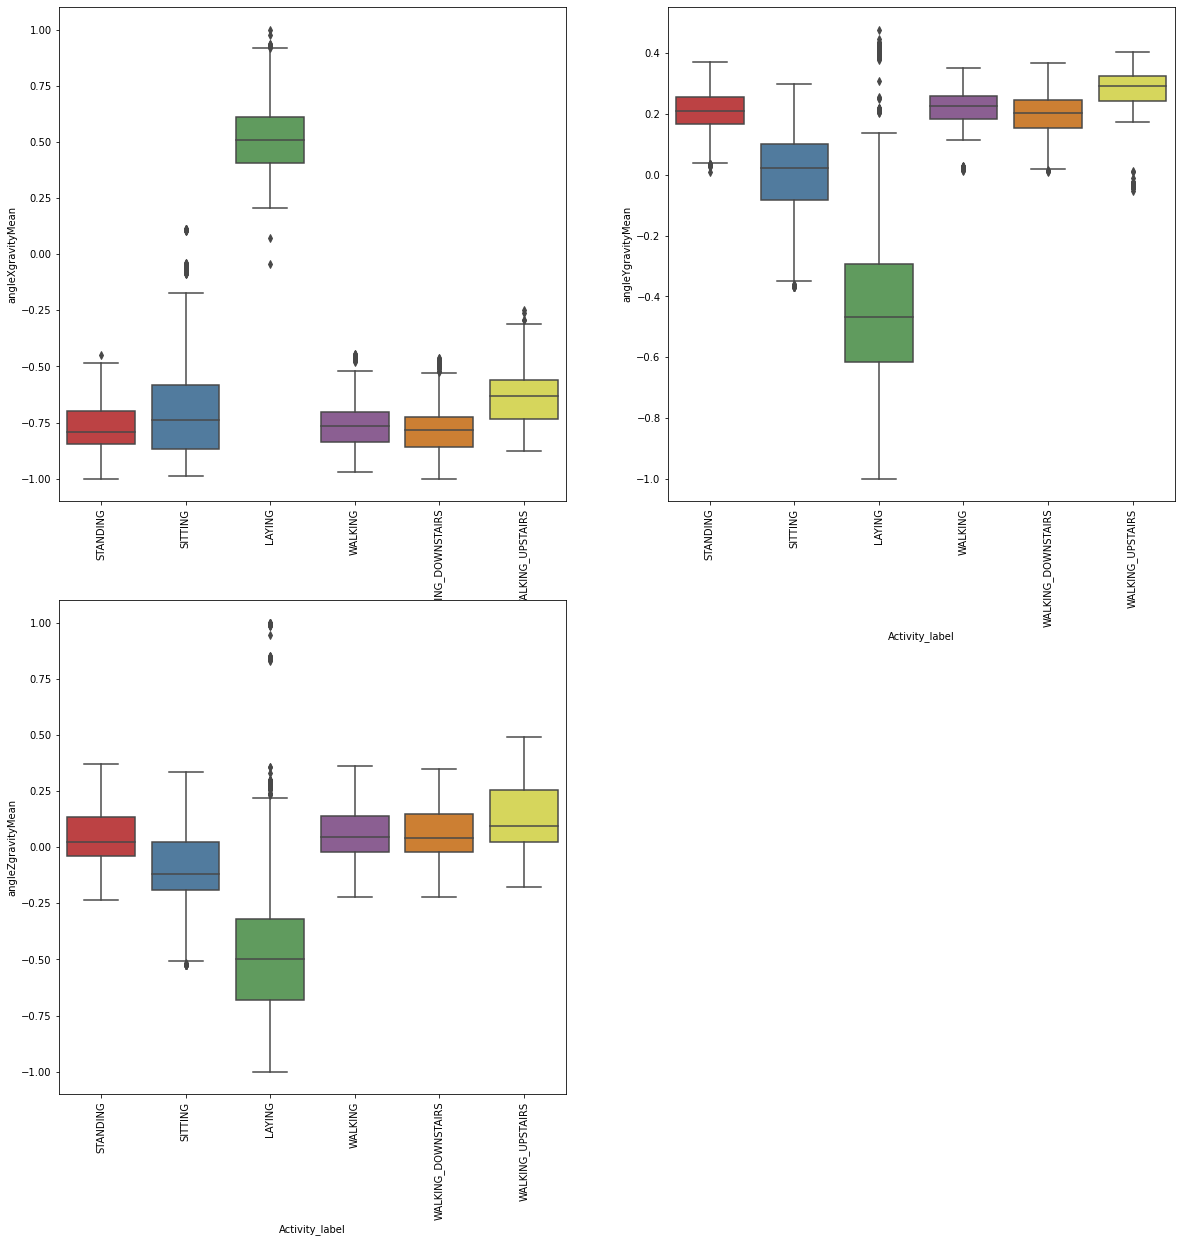

In [57]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x='Activity_label',y='angleXgravityMean',data=x_train)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='Activity_label',y='angleYgravityMean',data=x_train)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='Activity_label',y='angleZgravityMean',data=x_train)
plt.xticks(rotation=90);
# plt.subplot(2,2,4)
# sns.boxplot(x='Activity_label',y='angletBodyGyroJerkMeangravityMean',data=x_train)
# plt.xticks(rotation=90);

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

In [60]:
from sklearn.manifold import TSNE
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 124.7271118, gradient norm = 0.0280609 (50 iterations in 1.780s)
[t-SNE] Iteration 100: error = 107.0832138, gradient norm = 0.0285738 (50 iterations in 

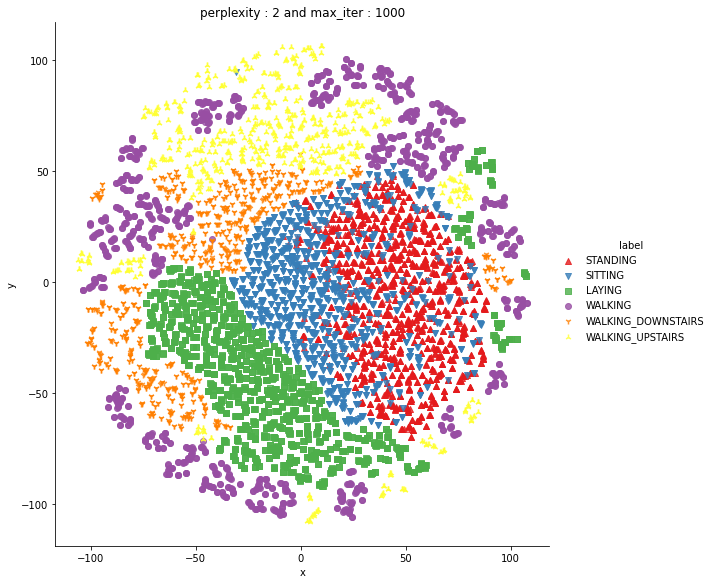

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 114.1048660, gradient norm = 0.0191303 (50 iterations in 1.753s)
[t-SNE] Iteration 100: error = 98.1050110, gradient norm = 0.0160893 (50 iteration

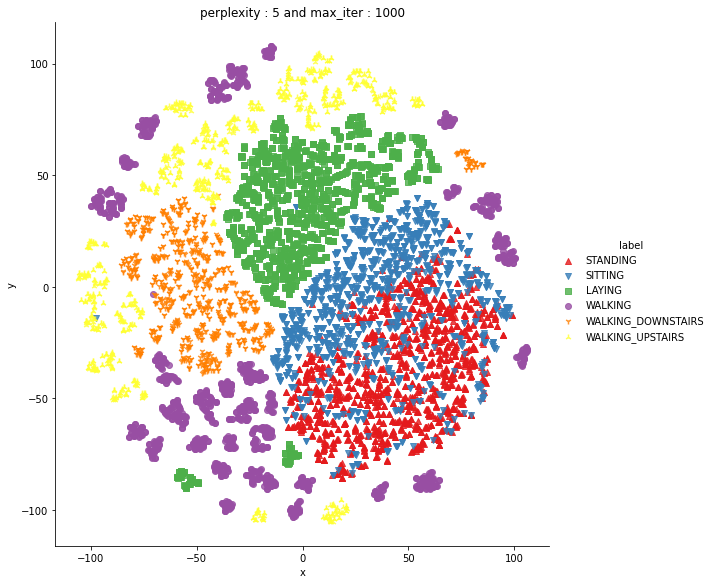

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 1.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.055s
[t-SNE] Iteration 50: error = 105.9613342, gradient norm = 0.0139778 (50 iterations in 2.060s)
[t-SNE] Iteration 100: error = 90.7353439, gradient norm = 0.0124973 (50 iteratio

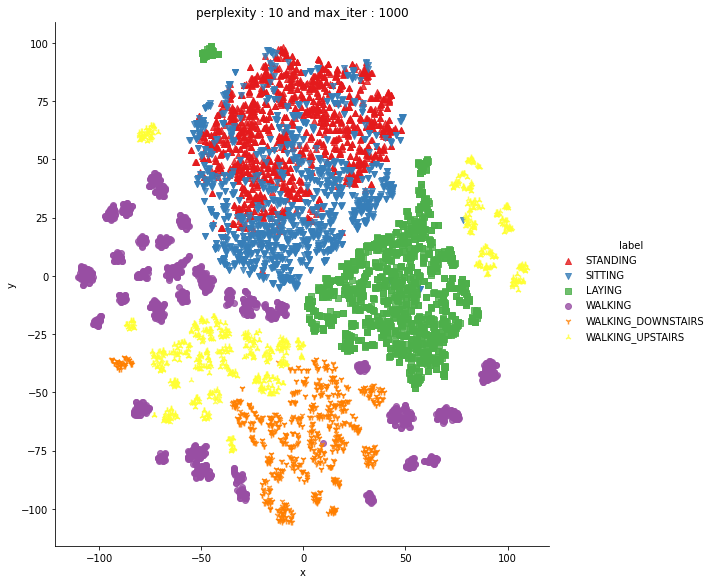

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 2.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.187s
[t-SNE] Iteration 50: error = 96.9873962, gradient norm = 0.0260486 (50 iterations in 2.043s)
[t-SNE] Iteration 100: error = 83.6899796, gradient norm = 0.0067083 (50 iteration

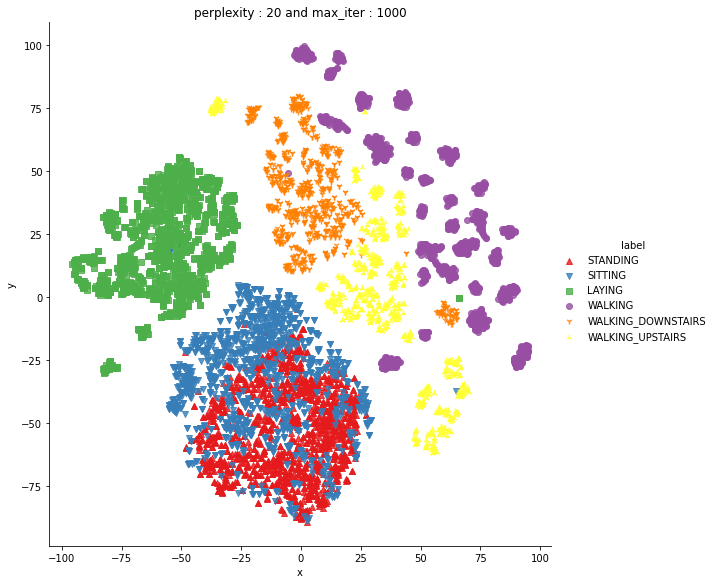

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.308s
[t-SNE] Iteration 50: error = 86.9561615, gradient norm = 0.0150869 (50 iterations in 2.222s)
[t-SNE] Iteration 100: error = 75.6302795, gradient norm = 0.0041991 (50 iteratio

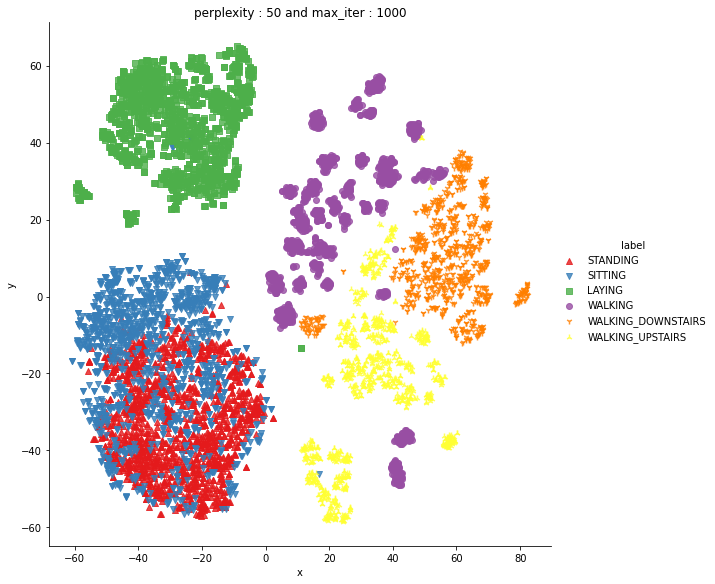

Done


In [64]:
X_pre_tsne = x_train.drop(['Subject', 'Activity','Activity_label'], axis=1)
y_pre_tsne = x_train['Activity_label']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])